Ce code prend les données de votre fichier CSV, sélectionne certaines colonnes pour le clustering, normalise ces données, puis utilise l'algorithme K-Means pour grouper les données en cinq clusters. Ensuite, il calcule la moyenne des valeurs dans chaque cluster, affiche ces moyennes sous forme de graphiques à barres, et affiche le DataFrame avec les identifiants de clusters ajoutés. Cela vous donne une vue d'ensemble du processus de clustering et de ses résultats.

      duration  wrong_fragment  num_failed_logins  logged_in  root_shell  \
0    -1.000000            -1.0               -1.0        1.5   -1.000000   
1    -1.000000            -1.0               -1.0        1.5   -1.000000   
2    -1.000000            -1.0               -1.0        1.5   -1.000000   
3    -1.000000            -1.0               -1.0        1.5   -1.000000   
4    -1.000000            -1.0               -1.0        1.5   -1.000000   
..         ...             ...                ...        ...         ...   
145  15.637871            -1.0               -1.0        1.5   -1.000000   
146   1.332412            -1.0               -1.0        1.5    7.333333   
147   8.122322            -1.0               -1.0        1.5    7.333333   
148   2.161714            -1.0               -1.0        1.5    7.333333   
149   1.436075            -1.0               -1.0        1.5    7.333333   

     dst_host_same_src_port_rate  dst_host_serror_rate  dst_host_rerror_rate  \
0      

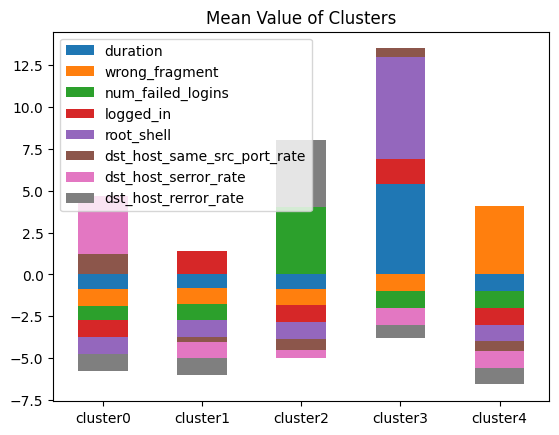

In [2]:
# -*- coding: utf-8 -*-
import pandas as pd  # Importe la bibliothèque pandas pour la manipulation des données
import numpy as np  # Importe la bibliothèque numpy pour les opérations numériques
import matplotlib.pyplot as plt  # Importe pyplot pour les visualisations graphiques
from sklearn.cluster import KMeans  # Importe KMeans de scikit-learn pour le clustering

# Définition du nombre de clusters pour K-Means
CLUSTER_NUM = 5

# Chargement des données depuis un fichier CSV
df_kddcup = pd.read_csv('dataset/kddcup.data_small.csv')
# Sélection de colonnes spécifiques à utiliser pour l'analyse
df_kddcup = df_kddcup.iloc[:, [0, 7, 10, 11, 13, 35, 37, 39]]

# Normalisation des données en soustrayant la moyenne de chaque colonne de ses valeurs et en divisant par la moyenne
df_kddcup = (df_kddcup - df_kddcup.mean()) / df_kddcup.std()

# Création d'un tableau numpy à partir des colonnes sélectionnées pour le clustering
kddcup_array = np.array([
    df_kddcup['duration'].tolist(),
    df_kddcup['wrong_fragment'].tolist(),
    df_kddcup['num_failed_logins'].tolist(),
    df_kddcup['logged_in'].tolist(),
    df_kddcup['root_shell'].tolist(),
    df_kddcup['dst_host_same_src_port_rate'].tolist(),
    df_kddcup['dst_host_serror_rate'].tolist(),
    df_kddcup['dst_host_rerror_rate'].tolist(),
], float)
# Transposition du tableau pour que les colonnes deviennent des lignes, conformément à l'entrée attendue par KMeans
kddcup_array = kddcup_array.T

# Application de l'algorithme K-Means sur les données
pred = KMeans(n_clusters=CLUSTER_NUM).fit_predict(kddcup_array)
# Ajout des identifiants de cluster résultants au DataFrame original
df_kddcup['cluster_id'] = pred
# Affichage du DataFrame modifié
print(df_kddcup)
# Affichage du nombre d'observations par cluster
print(df_kddcup['cluster_id'].value_counts())

# Préparation des données pour la visualisation
cluster_info = pd.DataFrame()
for i in range(CLUSTER_NUM):
    # Calcul et ajout de la moyenne des caractéristiques pour chaque cluster
    cluster_info['cluster' + str(i)] = df_kddcup[df_kddcup['cluster_id'] == i].mean()
# Suppression de la colonne cluster_id des données de visualisation
cluster_info = cluster_info.drop('cluster_id')
# Création du graphique à barres empilées montrant les valeurs moyennes pour chaque cluster
kdd_plot = cluster_info.T.plot(kind='bar', stacked=True, title="Mean Value of Clusters")
# Réglage des étiquettes de l'axe x pour une meilleure lisibilité
kdd_plot.set_xticklabels(kdd_plot.xaxis.get_majorticklabels(), rotation=0)

# Message de fin de script
print('finish!!')


In [3]:
df_kddcup = pd.read_csv('dataset/kddcup.data_small.csv')

In [5]:
print(df_kddcup.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
